# Project Overview

**Project Objective**

- This project involves the use of K-means clustering and PCA (Principal Component Analysis) for performing customer segmentation based on purchasing behavior within an e-commerce dataset.
- The aim is to discover distinct groups of customers with similar preferences and behaviors to enable personalized marketing strategies and recommendations.

**Dataset Information**

- The dataset will be used in this project is Online Retail Dataset from the UCI Machine Learning Repository.
- Dataset can be accessed at: https://archive.ics.uci.edu/ml/datasets/online+retail.
- This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **<center>Steps</center>**

### **1. Data Understanding & Data Preparation**

- Importing the necessary libraries. 
- Read the data.
- Data describtion.
- Data Exploration, Handling missing values and Handling Duplicates.
- Data Cleaning & Transformation: make this for each variable at a time.

## **2. Feature Engineering**

- Extract relevant features from the dataset that reflect customer behavior
  - **We will use RFM Analysis.**
  - **1. RFM** is an abbreviation for Recency, Frequency, and Monetary. RFM analysis is a technique that is used for customer segmentation. It groups customers according to their habits of purchase. It provides us to develop strategies for each of the groups.
    - **1.1 Recency:** It represents the last time a customer bought something.
    - **1.2 Frequency:** It is the total number of processes.
    - **1.3 Monetary:** It gives us the amount of payment.
  - **2. Product Diversity**
  - **2. Product Diversity**
  - **3. Behavioral Features**
  - **4. Geographic Features**
  - **5. Cancellation Cancellation_Rate**
  - **6. Seasonality & Trends**

## **3. Feature Scaling**

## **4. Dimensionality Reduction with PCA**

- Apply PCA to decrease the dimensionality of the feature space, aiming to retain the most informative features.
- This step is designed to highlight underlying patterns and structures in the data.

## **5. Determining Optimal Number of Clusters**

- We will carry out clustering using  K-Means Clustering Algorithm.
- We will use **the elbow method** to determine the optimal number of clusters for K-means clustering.

## **6. K-means Clustering**

- With the dimensionality reduced, we will perform K-means clustering to assign each customer to a cluster based on their feature values.
- Then analyzing the clusters to interpret the characteristics of each customer segment.

## **7. Visualization**

- Visualization using scatter plots to depict the clusters and their separation. This will aid in visualizing how customers are grouped in the reduced feature space and the distinctions between clusters.

## **8. Evaluation**

- Evaluation: Assess the clustering quality using appropriate metrics such as the silhouette score. This evaluation helps in understanding the cohesiveness and separation of the clusters, indicating the effectiveness of the segmentation.

## **9. Cluster Profiling & Personalization and Recommendations**

**Cluster Profiling:** Profiling each cluster by calculating specific metrics such as average spending and 
others for identifying the distinguishing features and behaviors of each cluster.

**Personalization and Recommendations:** Based on the identified customer segments, we will make personalized marketing strategies and recommendations, tailor promotions, product suggestions, and communication methods for each cluster to boost customer engagement and satisfaction.

## **10. Interpretation and Insights**

Interpret the outcomes of the segmentation and provide insights. Discuss the implications for the e-commerce business, including targeted marketing, customer retention strategies, or inventory management.

# <center>**1. Data Understanding & Data Preparation**</center>

### **Importing the necessary libraries.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import datetime as dt
import sklearn
import scipy
import plotly

print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")
print(f"Scipy Version: {scipy.__version__}")
print(f"Plotly Version: {plotly.__version__}")

Pandas Version: 2.2.2
Numpy Version: 1.26.4
Matplotlib Version: 3.9.2
Seaborn Version: 0.13.2
Scikit-learn Version: 1.5.1
Scipy Version: 1.13.1
Plotly Version: 5.24.1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import linregress
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

### **Read the data.**

In [2]:
Online_Retail = pd.read_excel('Online Retail.xlsx')

In [3]:
# copies the data so that we hold the original version of the data.
Retail_Copy = Online_Retail.copy()

In [4]:
Retail_Copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


### **Data describtion.**

In [5]:
Variables_Table = pd.read_excel('Variables_Table.xlsx')
Variables_Table

,Variable Name,Role,Type,Description,Units
0,InvoiceNo,ID,Categorical,"a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation",-
1,StockCode,ID,Categorical,a 5-digit integral number uniquely assigned to each distinct product,-
2,Description,Feature,Categorical,product name,-
3,Quantity,Feature,Integer,the quantities of each product (item) per transaction,-
4,InvoiceDate,Feature,Date,the day and time when each transaction was generated,-
5,UnitPrice,Feature,Continuous,product price per unit,sterling
6,CustomerID,Feature,Categorical,a 5-digit integral number uniquely assigned to each customer,-
7,Country,Feature,Categorical,the name of the country where each customer resides,-


### **Data Exploration, Handling missing values and Handling Duplicates.**

#### **Data Exploration**

In [6]:
# data dimensions
Retail_Copy.shape

(541909, 8)

In [7]:
Retail_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
Retail_Copy.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.000,9.552,-80995.000,1.000,3.000,10.000,80995.000,218.081
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.000,4.611,-11062.060,1.250,2.080,4.130,38970.000,96.760
CustomerID,406829.000,15287.691,12346.000,13953.000,15152.000,16791.000,18287.000,1713.600


In [9]:
Retail_Copy.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


#### **Handling missing values**

In [10]:
Retail_Copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**We are going to perform customer segmentation, though we will drop any row with missing value in CustomerID variable.**

In [11]:
Retail_Copy.dropna(subset='CustomerID', inplace=True)

In [12]:
Retail_Copy.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### **Handling Duplicates.**

In [13]:
Retail_Copy.duplicated().sum()

5225

**We have 5225 duplicates, and we are going to drop them.**

In [14]:
Retail_Copy.drop_duplicates(inplace=True)

In [15]:
Retail_Copy.duplicated().sum()

0

In [16]:
Retail_Copy.reset_index(drop=True, inplace = True)

In [17]:
Retail_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


**We have now 401604 observations without any duplicates or missing values**

### **Data Cleaning & Transformation: make this for each variable at a time.**


#### **1. InvoiceNo variable**

In [18]:
Variables_Table[Variables_Table['Variable Name']=='InvoiceNo']

,Variable Name,Role,Type,Description,Units
0,InvoiceNo,ID,Categorical,"a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation",-


**If a InvoiceNo starts with the letter ‘C’, it indicates a cancellation of order.**

In [19]:
cancelled_transactions = Retail_Copy[Retail_Copy["InvoiceNo"].str.contains("C", na=False)]
count_of_cancelled_transactions = cancelled_transactions['InvoiceNo'].count()
count_of_cancelled_transactions

8872

In [20]:
count_of_total_transactions = Retail_Copy['InvoiceNo'].count()
count_of_total_transactions

401604

In [21]:
cancelled_percentage = (count_of_cancelled_transactions/count_of_total_transactions)*100

In [22]:
print(f'The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%')

The percentage of cancelled transactions in the dataset is: 2.21%


In [23]:
pd.DataFrame(Retail_Copy['InvoiceNo'].describe()).T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542


- InvoiceNo: This is an object data type column that contains the invoice number for each transaction.
- Each invoice number can represent multiple items purchased in a single transaction.
- There are 22190 unique invoice numbers, indicating 22190 separate transactions.
- There are 8872 Cancelled Transactions.
- **Strategy for Handling Cancelled Transactions:**
- Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:
  - Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.
  - Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.

#### **2. StockCode variable**

In [24]:
Variables_Table[Variables_Table['Variable Name']=='StockCode']

,Variable Name,Role,Type,Description,Units
1,StockCode,ID,Categorical,a 5-digit integral number uniquely assigned to each distinct product,-


In [25]:
pd.DataFrame(Retail_Copy['StockCode'].describe()).T

,count,unique,top,freq
StockCode,401604,3684,85123A,2065


**StockCode:** An object data type column representing the product code for each item.

**lets see the highest ten products in units**

In [26]:
Retail_Copy.groupby('StockCode').agg({'StockCode':'count', 'Quantity':'sum','Description':'unique'}).rename(columns={'StockCode':'count'}).sort_values(by='count', ascending=False).head(10)

,count,Quantity,Description
StockCode,,,
85123A,2065,34185,"[WHITE HANGING HEART T-LIGHT HOLDER, CREAM HANGING HEART T-LIGHT HOLDER]"
22423,1894,11529,[REGENCY CAKESTAND 3 TIER]
85099B,1659,44963,[JUMBO BAG RED RETROSPOT]
47566,1409,15015,[PARTY BUNTING]
84879,1405,35215,[ASSORTED COLOUR BIRD ORNAMENT]
20725,1346,17224,"[LUNCH BAG RED RETROSPOT, LUNCH BAG RED SPOTTY]"
22720,1224,6857,[SET OF 3 CAKE TINS PANTRY DESIGN ]
POST,1196,3002,[POSTAGE]
22197,1110,48689,"[SMALL POPCORN HOLDER, POPCORN HOLDER]"


- **Product Variety:** The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the online retail store. This diversity can potentially lead to the identification of distinct customer clusters, with preferences for different types of products.
- **Stock Code Anomalies:** We observe that while most stock codes are composed of 5 or 6 characters(with number of numeric characters eqaul 5), there are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products. To maintain the focus of the project, which is clustering based on product purchases and creating a recommendation system, these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.

In [27]:
def filter_x(x):
    count=0
    for c in str(x):
        if c.isdigit():
            count+=1
    if count==5:
        x = False
    else:
        x = True
    return x    

In [28]:
Retail_Copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [29]:
Stock_Code_Anomalies = Retail_Copy[Retail_Copy['StockCode'].apply(filter_x)]

In [30]:
Stock_Code_Anomalies.groupby('StockCode').agg({'StockCode':'count', 'Quantity':'sum','Description':'unique'}).rename(columns={'StockCode':'count'})

,count,Quantity,Description
StockCode,,,
BANK CHARGES,12,12,[Bank Charges]
C2,134,133,[CARRIAGE]
CRUK,16,-16,[CRUK Commission]
D,77,-1194,[Discount]
DOT,16,16,[DOTCOM POSTAGE]
M,460,2944,[Manual]
PADS,4,4,[PADS TO MATCH ALL CUSHIONS]
POST,1196,3002,[POSTAGE]


- **Based on the analysis**, we find that a very small proportion of the records, 8 out of 3684(0.48%), have anomalous stock codes, which deviate from the typical format observed in the majority of the data.

- **These codes** seem to represent non-product transactions like "BANK CHARGES", "POST" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

- **The strategy** would be to filter out and remove rows with anomalous stock codes from the dataset before proceeding with further analysis and model development.

In [31]:
Retail_Copy=Retail_Copy[~Retail_Copy['StockCode'].apply(filter_x)]

In [32]:
Retail_Copy['StockCode'] = Retail_Copy['StockCode'].astype(str)

In [33]:
Retail_Copy.shape

(399689, 8)

#### **3. Description variable**

In [34]:
Variables_Table[Variables_Table['Variable Name']=='Description']

,Variable Name,Role,Type,Description,Units
2,Description,Feature,Categorical,product name,-


In [35]:
Retail_Copy.groupby('Description').agg({'StockCode':'count', 'Quantity':'sum','Description':'unique'}).rename(columns={'StockCode':'count'}).sort_values(by='count', ascending=False).head(10)

,count,Quantity,Description
Description,,,
WHITE HANGING HEART T-LIGHT HOLDER,2058,34128,[WHITE HANGING HEART T-LIGHT HOLDER]
REGENCY CAKESTAND 3 TIER,1894,11529,[REGENCY CAKESTAND 3 TIER]
JUMBO BAG RED RETROSPOT,1659,44963,[JUMBO BAG RED RETROSPOT]
PARTY BUNTING,1409,15015,[PARTY BUNTING]
ASSORTED COLOUR BIRD ORNAMENT,1405,35215,[ASSORTED COLOUR BIRD ORNAMENT]
LUNCH BAG RED RETROSPOT,1345,17024,[LUNCH BAG RED RETROSPOT]
SET OF 3 CAKE TINS PANTRY DESIGN,1224,6857,[SET OF 3 CAKE TINS PANTRY DESIGN ]
LUNCH BAG BLACK SKULL.,1099,11128,[LUNCH BAG BLACK SKULL.]
PACK OF 72 RETROSPOT CAKE CASES,1062,33386,[PACK OF 72 RETROSPOT CAKE CASES]


**Interestingly**, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [36]:
lowercase_descriptions = [desc for desc in Retail_Copy['Description'].unique() if any(char.islower() for char in desc)]
lowercase_descriptions

['BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'High Resolution Image']

**Strategy:**
- Step 1: Remove the rows where the descriptions contain service-related information like "Next Day Carriage" and "High Resolution Image", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.
- Step 2: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.


In [37]:
Retail_Copy=Retail_Copy[~((Retail_Copy['Description']=='Next Day Carriage')|(Retail_Copy['Description']=='High Resolution Image'))]

In [38]:
Retail_Copy.loc[:,'Description'] = Retail_Copy.loc[:,'Description'].str.upper()

In [39]:
pd.DataFrame(Retail_Copy[['StockCode', 'Description']].describe()).T

,count,unique,top,freq
StockCode,399606,3674,85123A,2065
Description,399606,3886,WHITE HANGING HEART T-LIGHT HOLDER,2058


In [40]:
Stock_Desc = Retail_Copy[['StockCode', 'Description']].drop_duplicates().reset_index(drop=True)

In [41]:
Stock_Desc['StockCode'].duplicated().sum()

232

In [42]:
Stock_Desc['Description'].duplicated().sum()

20

In [43]:
dub_Desc = Stock_Desc[Stock_Desc['Description'].duplicated()]['Description']

In [44]:
dub_Stock = Stock_Desc[Stock_Desc['StockCode'].duplicated()]['StockCode']


In [45]:
Retail_Copy[Retail_Copy['Description'].isin(dub_Desc)].sort_values(by='Description').drop_duplicates(subset='StockCode').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
723,536446,10133,COLOURING PENCILS BROWN TUBE,5,2010-12-01 12:15:00,0.850,15983.000,United Kingdom
218168,563674,10135,COLOURING PENCILS BROWN TUBE,40,2011-08-18 11:59:00,1.250,14132.000,United Kingdom
316966,573373,72131,COLUMBIAN CANDLE RECTANGLE,1,2011-10-30 13:37:00,1.950,14684.000,United Kingdom
124579,552285,72133,COLUMBIAN CANDLE RECTANGLE,2,2011-05-08 12:58:00,1.250,14684.000,United Kingdom
11844,537804,72128,COLUMBIAN CANDLE ROUND,9,2010-12-08 13:17:00,0.850,12748.000,United Kingdom


In [46]:
Retail_Copy[Retail_Copy['StockCode'].isin(dub_Stock)].sort_values(by='StockCode').drop_duplicates(subset='Description').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
66811,545054,16156L,"WRAP, CAROUSEL",25,2011-02-27 12:41:00,0.420,14472.000,United Kingdom
155882,556199,16156L,WRAP CAROUSEL,25,2011-06-09 12:40:00,0.420,16170.000,United Kingdom
251446,567338,17107D,FLOWER FAIRY 5 SUMMER DRAW LINERS,6,2011-09-19 15:00:00,2.550,14146.000,United Kingdom
14230,538156,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS",10,2010-12-09 16:53:00,2.550,15555.000,United Kingdom
249852,567183,17107D,FLOWER FAIRY 5 DRAWER LINERS,2,2011-09-18 15:32:00,2.550,14769.000,United Kingdom


- StockCode and Description variables represnt the products.
- By investigating unique values in each variable and make some analysis, we found that.
  - The same product Description had written in some case differently.
  - StockCode is unique identifier for the products.
  - **We can use StockCode to refer recomindations more likely than Description.**

#### **4. Quantity variable**

In [47]:
Variables_Table[Variables_Table['Variable Name']=='Quantity']

,Variable Name,Role,Type,Description,Units
3,Quantity,Feature,Integer,the quantities of each product (item) per transaction,-


In [48]:
pd.DataFrame(Retail_Copy['Quantity'].describe()).T


,count,mean,std,min,25%,50%,75%,max
Quantity,399606.000,12.232,250.863,-80995.000,2.000,5.000,12.000,80995.000


**Quantity:** This is an integer column indicating the quantity of products purchased in each transaction.
- The negative values indicate returned or cancelled orders

#### **5. InvoiceDate variable**

In [49]:
Variables_Table[Variables_Table['Variable Name']=='InvoiceDate']

,Variable Name,Role,Type,Description,Units
4,InvoiceDate,Feature,Date,the day and time when each transaction was generated,-


In [50]:
pd.DataFrame(Retail_Copy['InvoiceDate'].describe()).T

,count,mean,min,25%,50%,75%,max
InvoiceDate,399606,2011-07-10 12:11:38.976291584,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:51:00,2011-10-20 12:03:00,2011-12-09 12:50:00


**InvoiceDate:** A datetime column that records the date and time of each transaction.

- This variable has right formate type for analysis.
- The first purchase in our dataset at 2010-12-01 08:26:00.
- The first purchase in our dataset at 2011-12-09 12:50:00.

#### **6. UnitPrice variable**

In [51]:
Variables_Table[Variables_Table['Variable Name']=='UnitPrice']

,Variable Name,Role,Type,Description,Units
5,UnitPrice,Feature,Continuous,product price per unit,sterling


**UnitPrice:** A float column representing the unit price of each product.

In [52]:
pd.DataFrame(Retail_Copy['UnitPrice'].describe()).T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,399606.000,2.905,4.449,0.000,1.250,1.950,3.750,649.500


**Treating Zero Unit Prices**

In [53]:
Retail_Copy = Retail_Copy[~(Retail_Copy['UnitPrice']==0)]

In [54]:
Retail_Copy.shape

(399573, 8)

#### **7. CustomerID variable**

In [55]:
Variables_Table[Variables_Table['Variable Name']=='CustomerID']

,Variable Name,Role,Type,Description,Units
6,CustomerID,Feature,Categorical,a 5-digit integral number uniquely assigned to each customer,-


**CustomerID:** A float column that contains the customer ID for each transaction.

**Transforming data into a format suitable for analysis.**

In [56]:
Retail_Copy.loc[:,'CustomerID'] = Retail_Copy.loc[:,'CustomerID'].astype(str)

In [57]:
pd.DataFrame(Retail_Copy['CustomerID'].describe()).T

,count,unique,top,freq
CustomerID,399573,4362,17841.0,7800


**We have unique 4362 customers.**

#### **8. Country variable**

In [58]:
Variables_Table[Variables_Table['Variable Name']=='Country']

,Variable Name,Role,Type,Description,Units
7,Country,Feature,Categorical,the name of the country where each customer resides,-


In [59]:
pd.DataFrame(Retail_Copy['Country'].describe()).T

,count,unique,top,freq
Country,399573,37,United Kingdom,356008


In [60]:
Country_frec_No = Retail_Copy.groupby('Country').agg({'Country':'count'}).rename(columns={'Country':'count'}).sort_values(by='count', ascending=False).T
Country_frec_No

Country,United Kingdom,Germany,France,EIRE,Spain,Netherlands,Belgium,Switzerland,Portugal,Australia,Norway,Italy,Channel Islands,Finland,Cyprus,Sweden,Austria,Denmark,Japan,Poland,USA,Israel,Unspecified,Singapore,Iceland,Canada,Greece,Malta,United Arab Emirates,European Community,RSA,Lebanon,Lithuania,Brazil,Czech Republic,Bahrain,Saudi Arabia
count,356008,9079,8152,7368,2462,2326,1971,1843,1427,1253,1059,783,752,653,608,436,387,375,355,336,291,247,241,215,182,150,142,123,67,58,57,45,35,32,28,17,10


**Country:** An object column recording the country where each transaction took place.
- The transactions come from 37 different countries, with a dominant majority of the transactions (approximately 89.1%) originating from the United Kingdom.

**Step 3.7 | Outlier Treatment**
In K-means clustering, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. However, considering the context of this project where the final goal is to understand customer behavior and preferences through K-means clustering, it would be more prudent to address the issue of outliers after the feature engineering phase where we create a customer-centric dataset. At this stage, the data is transactional, and removing outliers might eliminate valuable information that could play a crucial role in segmenting customers later on. Therefore, we will postpone the outlier treatment and proceed to the next stage for now.

Quantity:
The average quantity of products in a transaction is approximately 9.55.
The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or cancelled orders, which need to be handled appropriately.
The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.
UnitPrice:
The average unit price of the products is approximately 4.61.
The unit price also shows a wide range, from -11062.06 to 38970, which suggests the presence of errors or noise in the data, as negative prices don't make sense.
Similar to the Quantity column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.
CustomerID:
There are 406829 non-null entries, indicating missing values in the dataset which need to be addressed.
The Customer IDs range from 12346 to 18287, helping in identifying unique customers.

**The data has been cleaned and well prepared for the next step. Feature engineering**

# <center>**2. Feature Engineering**</center>

**In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data**

**These features are useful in understanding the customers behavior, which represent a vital role in tailoring marketing strategies and offers to different customer segments.**

### **2.1 : RFM Features**

**RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:**

- Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.
- Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.
- Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

##### **2.1.1 : Recency (R)**

In [61]:
# Convert InvoiceDate to datetime and extract only the date
Retail_Copy.loc[:,'InvoiceDay'] = Retail_Copy.loc[:,'InvoiceDate'].dt.date

In [62]:
to_day = dt.date(2011, 12, 9)

In [63]:
R_table = pd.DataFrame(Retail_Copy.groupby('CustomerID').agg({'InvoiceDay':'max'})['InvoiceDay'].apply(lambda x : (to_day-x).days))
R_table.columns=['Recency']
R_table.sort_values(by='Recency').head()

,Recency
CustomerID,
13426.0,0
15910.0,0
16954.0,0
15804.0,0
17001.0,0


**Any customer with zero Recency value is The most warmest customer**

##### **2.1.2 : Frequency (F)**

**Total Products Purchased:**

  - We can engineer this feature also.
  - This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.

In [64]:
F_table = Retail_Copy.groupby('CustomerID').agg({'InvoiceNo':'nunique', 'Quantity':'sum'})
F_table.columns=['Frequency', 'Total_Products_Purchased']
F_table.head()

,Frequency,Total_Products_Purchased
CustomerID,,
12346.0,2,0
12347.0,7,2458
12348.0,4,2332
12349.0,1,630
12350.0,1,196


##### **2.1.3 : Monetary (M)**

**Monetary :** This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

In [65]:
Retail_Copy.loc[:,'TotalPrice'] = Retail_Copy.loc[:,'UnitPrice']*Retail_Copy.loc[:,'Quantity']

In [66]:
M_table = Retail_Copy.groupby('CustomerID').agg({'TotalPrice':'sum'})
M_table.columns=['Monetary']
M_table.sort_values(by='Monetary').head()

,Monetary
CustomerID,
14213.0,-1192.200
15823.0,-811.860
16742.0,-464.900
16252.0,-295.090
12666.0,-227.440


In [67]:
data_per_customer=R_table.merge(F_table, on='CustomerID').merge(M_table, on='CustomerID')

**Average Transaction Value:**
This feature is calculated as the Total Spend divided by the Total Transactions for each customer. It indicates the average value of a transaction carried out by a customer.

In [68]:
data_per_customer.loc[:,'Avg_Transaction_Value'] = data_per_customer.loc[:,'Monetary']/data_per_customer.loc[:,'Frequency']

In [69]:
data_per_customer.head()

,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value
CustomerID,,,,,
12346.0,325,2,0,0.000,0.000
12347.0,2,7,2458,4310.000,615.714
12348.0,75,4,2332,1437.240,359.310
12349.0,18,1,630,1457.550,1457.550
12350.0,310,1,196,294.400,294.400


### **2.2 : Product Diversity**

- **Unique Products Purchased:**
This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. 

In [70]:
unique_products_purchased=Retail_Copy.groupby('CustomerID').agg({'StockCode':'nunique'}).rename(columns={'StockCode': 'Unique_Products_Purchase'})

In [71]:
data_per_customer = pd.merge(data_per_customer, unique_products_purchased, on='CustomerID')

In [72]:
data_per_customer.head()

,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase
CustomerID,,,,,,
12346.0,325,2,0,0.000,0.000,1
12347.0,2,7,2458,4310.000,615.714,103
12348.0,75,4,2332,1437.240,359.310,21
12349.0,18,1,630,1457.550,1457.550,72
12350.0,310,1,196,294.400,294.400,16


### **2.3 : Behavioral Features**

**Average Days Between Purchases:**
- This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

**Favorite Shopping Day:** 
- This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

**Favorite Shopping Hour:**
- This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

In [73]:
Retail_Copy['Day_Of_Week'] = Retail_Copy['InvoiceDate'].dt.dayofweek
Retail_Copy['Hour'] = Retail_Copy['InvoiceDate'].dt.hour

In [74]:
days_between_purchases = Retail_Copy.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))

average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()

average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)
average_days_between_purchases.head()

/var/folders/r9/013lqpnn2cj0hh05j71mb64h0000gn/T/ipykernel_1101/578052893.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = Retail_Copy.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))


,CustomerID,Average_Days_Between_Purchases
0,12346.0,0.000
1,12347.0,2.017
2,12348.0,10.885
3,12349.0,0.000
4,12350.0,0.000


In [75]:
# Find the favorite shopping day of the week

favorite_shopping_day = Retail_Copy.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')

favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]
favorite_shopping_day.head()

,CustomerID,Day_Of_Week
0,12346.0,1
2,12347.0,1
6,12348.0,3
8,12349.0,0
9,12350.0,2


In [76]:
# Find the favorite shopping hour of the day
favorite_shopping_hour = Retail_Copy.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]
favorite_shopping_hour.head()

,CustomerID,Hour
0,12346.0,10
5,12347.0,14
9,12348.0,19
10,12349.0,9
11,12350.0,16


In [77]:
data_per_customer = pd.merge(data_per_customer, average_days_between_purchases, on='CustomerID')
data_per_customer = pd.merge(data_per_customer, favorite_shopping_day, on='CustomerID')
data_per_customer = pd.merge(data_per_customer, favorite_shopping_hour, on='CustomerID')
data_per_customer.head()

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16


### **2.4 : Geographic Features**

**Country:** 

This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.


In [78]:
Retail_Copy['Country'].value_counts(normalize=True).head()

Country
United Kingdom   0.891
Germany          0.023
France           0.020
EIRE             0.018
Spain            0.006
Name: proportion, dtype: float64

- Given that a substantial portion (89%) of transactions are originating from the United Kingdom, we might consider creating a binary feature indicating whether the transaction is from the UK or not. 

In [79]:
binary_country = pd.DataFrame(Retail_Copy.groupby('CustomerID').agg({'Country':lambda x:x.value_counts().index[0]})['Country'].apply(lambda x: 1 if x=='United Kingdom' else 0))

In [80]:
binary_country.rename(columns={'Country':'Is_UK'}, inplace=True)
binary_country.head()

,Is_UK
CustomerID,
12346.0,1
12347.0,0
12348.0,0
12349.0,0
12350.0,0


In [81]:
data_per_customer=data_per_customer.merge(binary_country, on = 'CustomerID')

In [82]:
data_per_customer.head()

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0


### **2.5 : Cancellation Cancellation_Rate**


**Cancellation Frequency:**

- This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

**Cancellation Rate:**

- This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

In [83]:
Retail_Copy['Transaction_Status'] = np.where(Retail_Copy['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [84]:
cancellation_freq = Retail_Copy[Retail_Copy['Transaction_Status']=='Cancelled'].groupby('CustomerID').agg({'InvoiceNo':'nunique'})
cancellation_freq.rename(columns={'InvoiceNo': 'Cancel_Freq'}, inplace=True)
data_per_customer = data_per_customer.merge(cancellation_freq, on='CustomerID', how='left')
data_per_customer['Cancel_Freq'] = data_per_customer['Cancel_Freq'].fillna(0)
data_per_customer

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
4277,18280.0,277,1,45,180.600,180.600,10,0.000,0,9,1,0.000
4278,18281.0,180,1,54,80.820,80.820,7,0.000,6,10,1,0.000
4279,18282.0,7,3,98,176.600,58.867,12,9.917,4,13,1,1.000
4280,18283.0,3,16,1355,2039.580,127.474,262,0.465,3,14,1,0.000


In [85]:
data_per_customer['Cancel_Rate'] = data_per_customer['Cancel_Freq']/data_per_customer['Frequency']
data_per_customer.head()

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000,0.500
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000,0.000
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000,0.000
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000,0.000
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000,0.000


### **2.6 :  Seasonality & Trends**

**Monthly_Spending_Mean:** 
- This is the average amount a customer spends monthly.

**Monthly_Spending_Std:**
- This feature indicates the variability in a customer's monthly spending.

**Spending_Trend:**
- This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

In [86]:
Retail_Copy['month'] = Retail_Copy['InvoiceDate'].dt.month
Retail_Copy['year'] = Retail_Copy['InvoiceDate'].dt.year

In [87]:
seasonal_buying_patterns=Retail_Copy.groupby(['CustomerID', 'year', 'month']).agg({'TotalPrice':'sum'}).reset_index().groupby('CustomerID')['TotalPrice'].agg(['mean','std'])
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)
seasonal_buying_patterns.fillna(0,inplace=True)
seasonal_buying_patterns.reset_index(inplace=True)
seasonal_buying_patterns.head()

,CustomerID,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,0.000,0.000
1,12347.0,615.714,341.071
2,12348.0,359.310,203.876
3,12349.0,1457.550,0.000
4,12350.0,294.400,0.000


In [88]:
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

spending_trends=Retail_Copy.groupby(['CustomerID', 'year', 'month']).agg({'TotalPrice':'sum'}).reset_index().groupby('CustomerID')[['TotalPrice']].agg(calculate_trend)
spending_trends.rename(columns={'TotalPrice': 'Spending_Trend'}, inplace=True)
spending_trends.reset_index(inplace=True)
spending_trends.head()

,CustomerID,Spending_Trend
0,12346.0,0.000
1,12347.0,4.486
2,12348.0,-100.884
3,12349.0,0.000
4,12350.0,0.000


In [89]:
data_per_customer = pd.merge(data_per_customer, seasonal_buying_patterns, on='CustomerID')

In [90]:
data_per_customer = pd.merge(data_per_customer, spending_trends, on='CustomerID')

In [91]:
data_per_customer.head()

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000,0.500,0.000,0.000,0.000
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000,0.000,615.714,341.071,4.486
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000,0.000,359.310,203.876,-100.884
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000,0.000,1457.550,0.000,0.000
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000,0.000,294.400,0.000,0.000


**We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.**

In [92]:
data_per_customer.head(10)

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000,0.500,0.000,0.000,0.000
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000,0.000,615.714,341.071,4.486
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000,0.000,359.310,203.876,-100.884
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000,0.000,1457.550,0.000,0.000
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000,0.000,294.400,0.000,0.000
5,12352.0,36,8,463,1265.410,158.176,57,3.133,1,14,0,1.000,0.125,316.353,134.701,9.351
6,12353.0,204,1,20,89.000,89.000,4,0.000,3,17,0,0.000,0.000,89.000,0.000,0.000
7,12354.0,232,1,530,1079.400,1079.400,58,0.000,3,13,0,0.000,0.000,1079.400,0.000,0.000
8,12355.0,214,1,240,459.400,459.400,13,0.000,0,13,0,0.000,0.000,459.400,0.000,0.000
9,12356.0,22,3,1573,2487.430,829.143,52,5.316,1,9,0,0.000,0.000,829.143,991.463,-944.635


In [93]:
data_per_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   object 
 1   Recency                         4282 non-null   int64  
 2   Frequency                       4282 non-null   int64  
 3   Total_Products_Purchased        4282 non-null   int64  
 4   Monetary                        4282 non-null   float64
 5   Avg_Transaction_Value           4282 non-null   float64
 6   Unique_Products_Purchase        4282 non-null   int64  
 7   Average_Days_Between_Purchases  4282 non-null   float64
 8   Day_Of_Week                     4282 non-null   int32  
 9   Hour                            4282 non-null   int32  
 10  Is_UK                           4282 non-null   int64  
 11  Cancel_Freq                     4282 non-null   float64
 12  Cancel_Rate                     42

# <center>**3. Feature Scaling**</center>

- Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA.
- Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, we am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

  - **CustomerID:** This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
  - **Is_UK:** This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
  - **Day_Of_Week:** Categorical feature range from 0 to 6 and does not need to scale.
  - **Frequency:** Categorical feature that represent total No of purchases and does not need to scale.
  - **Cancel_Rate:** Range from 0 to 1 and does not need to scale.

In [94]:
scale = StandardScaler()
col_to_ex = ['CustomerID','Is_UK','Day_Of_Week','Frequency','Cancel_Rate']
col_to_scale = data_per_customer.columns.difference(col_to_ex)
data_scaled_customer = data_per_customer.copy()
data_scaled_customer[col_to_scale] = scale.fit_transform(data_scaled_customer[col_to_scale])
data_scaled_customer.head()

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.377,2,-0.241,-0.231,-0.833,-0.715,-0.300,1,-1.076,1,0.107,0.500,-0.450,-0.284,0.054
1,12347.0,-0.882,7,0.281,0.286,0.757,0.475,-0.124,1,0.656,0,-0.398,0.000,0.159,0.225,0.064
2,12348.0,-0.146,4,0.254,-0.059,0.095,-0.482,0.650,3,2.822,0,-0.398,0.000,-0.095,0.020,-0.161
3,12349.0,-0.721,1,-0.107,-0.056,2.932,0.113,-0.300,0,-1.509,0,-0.398,0.000,0.993,-0.284,0.054
4,12350.0,2.226,1,-0.199,-0.196,-0.073,-0.540,-0.300,2,1.523,0,-0.398,0.000,-0.159,-0.284,0.054


# <center>**4. Dimensionality Reduction with PCA**</center>

**Why We Need Dimensionality Reduction?**
  - **Better Clustering with K-means:** Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.
  - **Enhanced Visualization:** In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.

- We will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

In [95]:
data_scaled_customer.set_index('CustomerID', inplace=True)

In [96]:
pca = PCA().fit(data_scaled_customer)
pca.explained_variance_ratio_

array([8.73667840e-01, 3.50937139e-02, 2.96426109e-02, 1.11172519e-02,
       1.10223914e-02, 1.02348300e-02, 9.14325360e-03, 6.98893337e-03,
       4.53196772e-03, 3.61247848e-03, 2.13632610e-03, 1.46848171e-03,
       8.20253893e-04, 3.43567741e-04, 1.76098985e-04])

/Users/drmorsy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


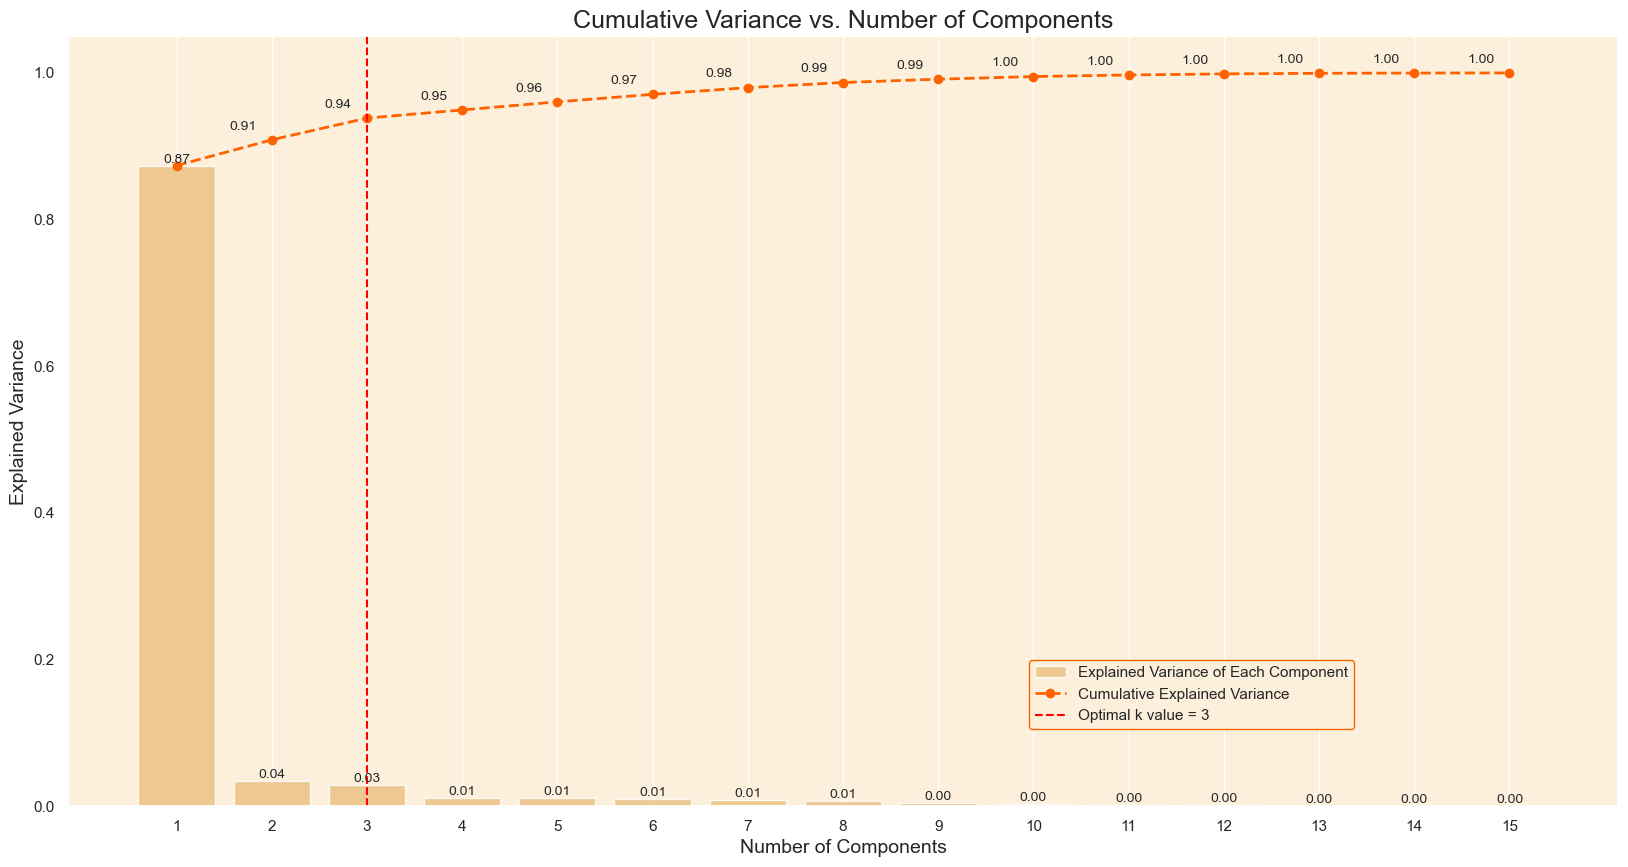

In [97]:
# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 3

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)
# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  
# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

- To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

- From the plot, we can see that the increase in cumulative variance starts to slow down after the 3rd component (which captures about 94% of the total variance).

- Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 3 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [98]:
pca = PCA(n_components=3)
customer_data_pca = pca.fit_transform(data_scaled_customer)
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

customer_data_pca.index = data_scaled_customer.index
customer_data_pca.head()

,PC1,PC2,PC3
CustomerID,,,
12346.0,-3.196,1.486,-0.957
12347.0,1.996,1.559,0.362
12348.0,-1.126,-0.539,0.251
12349.0,-3.962,2.960,1.606
12350.0,-4.202,0.461,-0.123


# <center>**5. Determining Optimal Number of Clusters**</center>

**Elbow Method**

- The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

In [99]:
list_of_inertais = []
for n in range(2,10):
    km = KMeans(n_clusters=n, n_init='auto')
    km.fit(customer_data_pca) #we do not want prediction beacause we just going to calculate inertia.
    list_of_inertais.append(km.inertia_)

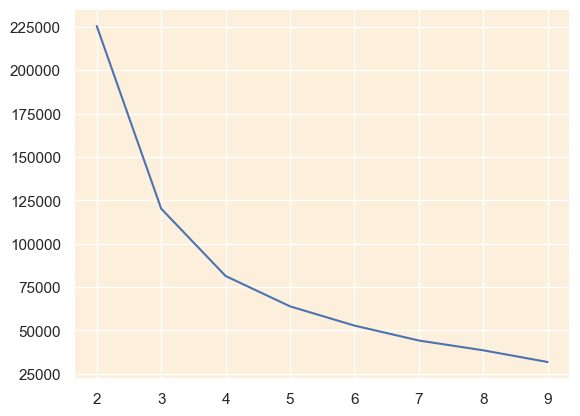

In [100]:
list_of_inertais
plt.plot(range(2,10), list_of_inertais)

##### **Optimal k Value: Elbow Method Insights**

- The optimal value of k for the KMeans clustering algorithm can be found at the elbow point.
- We observe that the suggested optimal k value is 4. However, we don't have a very distinct elbow point in this case, which is common in real-world data. But from the plot, we can see that the inertia continues to decrease significantly up to k=4.

# <center>**6. K-means Clustering**</center>

**In this step,** we are going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

In [101]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
new_labels = kmeans.fit_predict(customer_data_pca)

In [102]:
customer_data_pca['cluster'] = new_labels
customer_data_pca.head()

,PC1,PC2,PC3,cluster
CustomerID,,,,
12346.0,-3.196,1.486,-0.957,0
12347.0,1.996,1.559,0.362,0
12348.0,-1.126,-0.539,0.251,0
12349.0,-3.962,2.960,1.606,0
12350.0,-4.202,0.461,-0.123,0


In [103]:
data_per_customer['cluster'] = new_labels
data_per_customer.head(10)

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000,0.500,0.000,0.000,0.000,0
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000,0.000,615.714,341.071,4.486,0
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000,0.000,359.310,203.876,-100.884,0
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000,0.000,1457.550,0.000,0.000,0
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000,0.000,294.400,0.000,0.000,0
5,12352.0,36,8,463,1265.410,158.176,57,3.133,1,14,0,1.000,0.125,316.353,134.701,9.351,3
6,12353.0,204,1,20,89.000,89.000,4,0.000,3,17,0,0.000,0.000,89.000,0.000,0.000,0
7,12354.0,232,1,530,1079.400,1079.400,58,0.000,3,13,0,0.000,0.000,1079.400,0.000,0.000,0
8,12355.0,214,1,240,459.400,459.400,13,0.000,0,13,0,0.000,0.000,459.400,0.000,0.000,0
9,12356.0,22,3,1573,2487.430,829.143,52,5.316,1,9,0,0.000,0.000,829.143,991.463,-944.635,0


# <center>**7. Visualization**</center>

In this part, I am going to choose the top 3 PCs (which capture the most variance in the data 60%) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

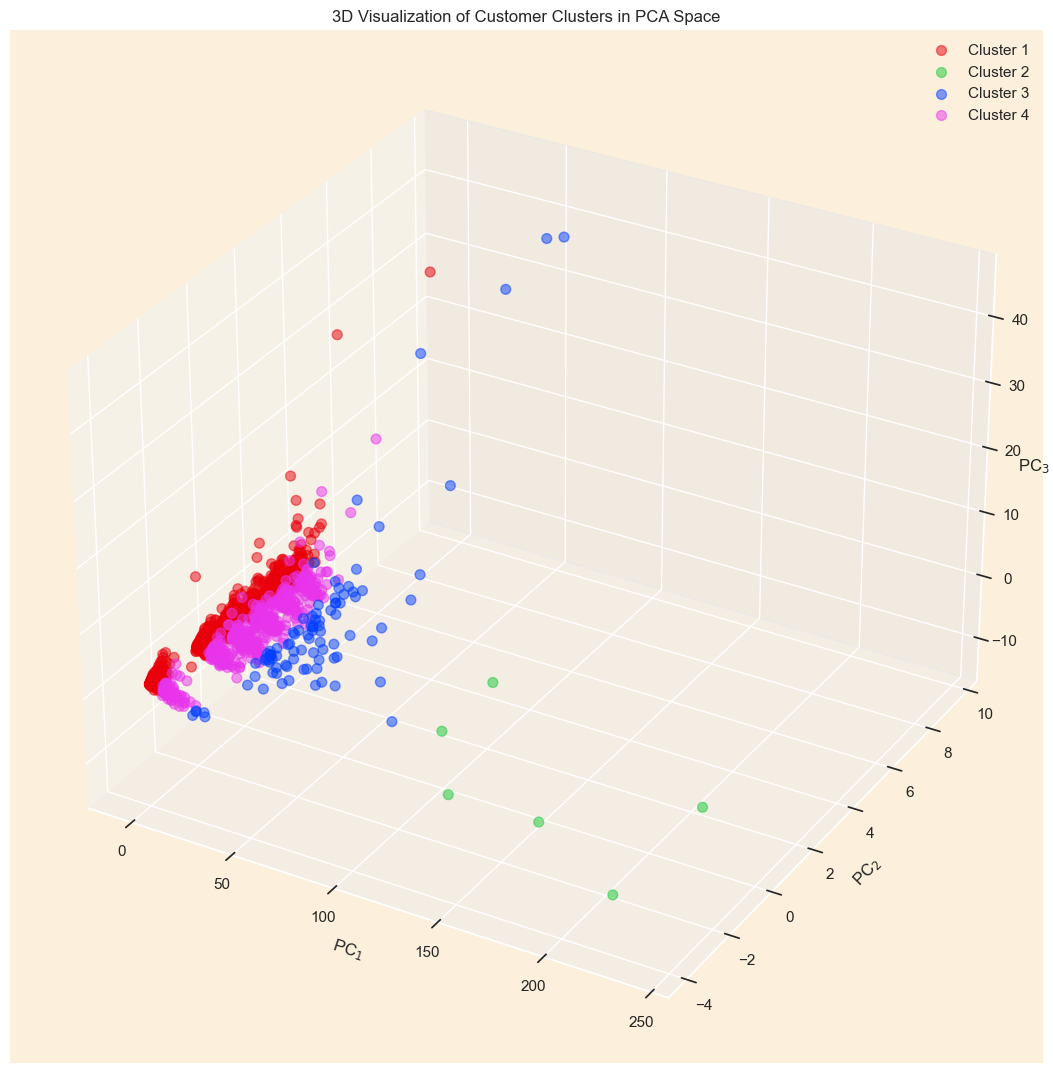

In [104]:
ax = plt.subplot(projection="3d")
plt.gcf().set_size_inches(10,10)
colors = ['#e8000b', '#1ac938', '#023eff', "#e834eb"]
for i in range(4):
    subset = customer_data_pca[customer_data_pca["cluster"] == i].iloc[:,:-1].T.values
    ax.scatter(*subset, 
               s=50,
               alpha=.5,
               c= colors[i])

ax.set_xlabel("PC${_1}$")
ax.set_ylabel("PC${_2}$")
ax.set_zlabel("PC${_3}$", labelpad=0)

plt.tight_layout(pad=-1)
ax.zaxis.set_rotate_label(False)
plt.legend(["Cluster {}".format(i) for i in range(1,5)], frameon=False)
plt.title("3D Visualization of Customer Clusters in PCA Space")

plt.show()

**Top 2 PCA plot**

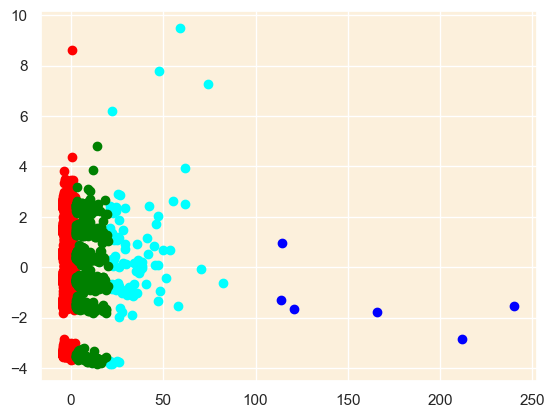

In [106]:
plt.scatter(customer_data_pca[customer_data_pca['cluster']==0]['PC1'], customer_data_pca[customer_data_pca['cluster']==0]['PC2'], color='red')
plt.scatter(customer_data_pca[customer_data_pca['cluster']==1]['PC1'], customer_data_pca[customer_data_pca['cluster']==1]['PC2'], color='blue')
plt.scatter(customer_data_pca[customer_data_pca['cluster']==2]['PC1'], customer_data_pca[customer_data_pca['cluster']==2]['PC2'], color='cyan')
plt.scatter(customer_data_pca[customer_data_pca['cluster']==3]['PC1'], customer_data_pca[customer_data_pca['cluster']==3]['PC2'], color='green')
plt.show()

**3 PCAs is better to represent clusters than 2PCAs**

# <center>**8. Evaluation**</center>

- **Silhouette Score:** A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.

In [107]:
# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)

print(sil_score)

0.605662201624319


**Clustering Quality Inference**

  - **The Silhouette** Score of approximately 0.3, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

# <center>**9. Cluster Profiling & Personalization and Recommendations**</center>

**- Profiling each cluster by calculating the mean for numerical features and mode for categorical features.**

In [108]:
data_per_cluster = data_per_customer.set_index('cluster').drop('CustomerID', axis=1)
data_per_cluster.head()

,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
cluster,,,,,,,,,,,,,,,
0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000,0.500,0.000,0.000,0.000
0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000,0.000,615.714,341.071,4.486
0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000,0.000,359.310,203.876,-100.884
0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000,0.000,1457.550,0.000,0.000
0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000,0.000,294.400,0.000,0.000


In [109]:
Cat_Features = ['Day_Of_Week', 'Hour', 'Is_UK']
Num_Features = data_per_cluster.columns.difference(Cat_Features)
Cat_Cluster_Profiling = data_per_cluster.groupby('cluster')[Cat_Features].agg(lambda x:x.value_counts().index[0])
Num_Cluster_Profiling = data_per_cluster.groupby('cluster')[Num_Features].agg('mean')

In [110]:
Features_Cluster_Profiling = Num_Cluster_Profiling.merge(Cat_Cluster_Profiling, on='cluster')

- **Rounding some features values then convert them to integers.**
- **This action makes these features more insightful.**

In [111]:
round_features = ['Cancel_Freq','Frequency', 'Recency','Total_Products_Purchased', 'Unique_Products_Purchase']

In [112]:
Features_Cluster_Profiling[round_features] = Features_Cluster_Profiling[round_features].round(0).astype(int)

- **Transform Features_Cluster_Profiling table to see each cluster features clearly.**

In [113]:
Features_Cluster_Profiling.T

cluster,0,1,2,3
Average_Days_Between_Purchases,3.707,0.113,1.064,2.282
Avg_Transaction_Value,315.185,330.911,599.026,323.512
Cancel_Freq,0.000,30.000,6.000,2.000
Cancel_Rate,0.091,0.198,0.175,0.182
Frequency,3.000,165.000,38.000,12.000
Monetary,834.765,54423.773,25724.146,4147.108
Monthly_Spending_Mean,383.484,4186.444,2153.521,575.874
Monthly_Spending_Std,118.249,2298.868,1616.431,372.911
Recency,103.000,1.000,9.000,26.000
Spending_Trend,-33.555,242.239,8.874,12.989


**Customer Profiles Derived from Features_Cluster_Profiling table:**

**1. Cluster 0:**

  - **Profile:** Sporadic Shoppers with negative spending trend (Need Attention).

    - All features are moderate with low frequency which lead to low Monetary.
    - **Marketing strategy :** Always we need to be close to them for getting their attention.

**2. Cluster 1:**

  - **Profile:** Very big spenders with highest positive spending trend(Loyal Customers).

    - The highest in features that mean that customer more valuable and profitable in our bussiness.
    - The warmest group with highest spending.
    - The highest in cancellation frequency.
    - Highest Cancellation Rate.
    - **Marketing strategy :** More communication to handel the cancellation rate.
    - Need more offers to increase average transaction per purchase.


**3. Cluster 2:**

  - **Profile:** Close to be loyal customers(Diamond group).

    - It looks similar like loyal group but lower in frequency and recency which lead to be lower in monetary.
    - This group called diamond group and has high potential to lead growth in our bussiness.
    - **Marketing strategy :** 70% of our advertisements should direct to this group
    - High communication to make longterm partenership.
   
**4. Cluster 3:**

  - **Profile:** Above moderate in spending with high cancellation rate(About to sleep).
    
     - **Marketing strategy :** More communication to handel the cancellation rate.


In [114]:
data_per_customer.head()

,CustomerID,Recency,Frequency,Total_Products_Purchased,Monetary,Avg_Transaction_Value,Unique_Products_Purchase,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancel_Freq,Cancel_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.000,0.000,1,0.000,1,10,1,1.000,0.500,0.000,0.000,0.000,0
1,12347.0,2,7,2458,4310.000,615.714,103,2.017,1,14,0,0.000,0.000,615.714,341.071,4.486,0
2,12348.0,75,4,2332,1437.240,359.310,21,10.885,3,19,0,0.000,0.000,359.310,203.876,-100.884,0
3,12349.0,18,1,630,1457.550,1457.550,72,0.000,0,9,0,0.000,0.000,1457.550,0.000,0.000,0
4,12350.0,310,1,196,294.400,294.400,16,0.000,2,16,0,0.000,0.000,294.400,0.000,0.000,0


In [115]:
customer_data_pca.head()

,PC1,PC2,PC3,cluster
CustomerID,,,,
12346.0,-3.196,1.486,-0.957,0
12347.0,1.996,1.559,0.362,0
12348.0,-1.126,-0.539,0.251,0
12349.0,-3.962,2.960,1.606,0
12350.0,-4.202,0.461,-0.123,0


### **Recommendation**

In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. 
Leveraging this information, we will make personalized recommendations, suggesting the top three products popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales.

**Step 1:** Merge the transaction data with the customer data to get the cluster information for each transaction.

**Step 2:** Identify the top 10 best-selling products in each cluster based on the total quantity sold.

In [116]:
merged_data = Retail_Copy.merge(data_per_customer[['CustomerID', 'cluster']], on='CustomerID', how='inner')

best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)
top_products_per_cluster.head()

,cluster,StockCode,Description,Quantity
2924,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,19205
417,0,21212,PACK OF 72 RETROSPOT CAKE CASES,14163
29,0,16014,SMALL CHINESE STYLE SCISSOR,13116
3340,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12469
3161,0,84879,ASSORTED COLOUR BIRD ORNAMENT,11478


- **Step 3:** Create a record of products purchased by each customer in each cluster.

In [117]:
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()
customer_purchases.head()

,CustomerID,cluster,StockCode,Quantity
0,12346.0,0,23166,0
1,12347.0,0,16008,24
2,12347.0,0,17021,36
3,12347.0,0,20665,6
4,12347.0,0,20719,40


**Step 4:** Generate recommendations for each customer in each cluster

In [118]:
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = data_per_customer[data_per_customer['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased
        [['StockCode', 'Description']].values.flatten().tolist())


**Step 5:** Create a dataframe from the recommendations list and merge it with the original customer data.

In [119]:
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = data_per_customer.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

**Display 10 random rows from the customer_data_with_recommendations dataframe**

In [120]:
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
16926.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
15636.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
14048.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
14871.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
15374.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
12403.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
13600.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
13936.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,21212,PACK OF 72 RETROSPOT CAKE CASES,16014,SMALL CHINESE STYLE SCISSOR
13515.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,16014,SMALL CHINESE STYLE SCISSOR,84879,ASSORTED COLOUR BIRD ORNAMENT


# <center>**10. Interpretation and Insights**</center>

1. Clustering our customers to distinct groups with common characteristics help in custimizing your marketing stratigy to be more efficient.
2. Not all customers can be handeled or made them more engaged by the same way.
3. Some customers may be have some issues and need to deep comunication to identify the problem and handel them, like group with high cancellation rate.
4. The core of our bussiness is located in UK and this give us two information:
  - **first:** We must focus and study UK market deeply and keep updated about this market since it represent our bussiness.
  - **second:** We great oppertunity to grow through markets other than UK, specially those we have already customers there.

5. Create Recommindaton system using machine learning is magical tool to promot the right product to the right customer.
6. **Customer retention strategies:**
  - Customer with high recency and low frequency need more adds.
  - Customer with high cancellation rate need more communication.
  - Customer with low Unique Products Purchase need more offers with products purchaed in the same cluster.
  - And so on for all features we can tailor retention and marketing strategies


# <center>**THANKS**</center>